Use this notebook to run and analyze the results from the xbeach model.

* Try to match the wave heights first. Also need to be checking the depth averaged velocity but that isn't measured at that many locations
* Try to get a general fit with this model not an exact one


Author: WaveHello

Date: 07/15/2024

In [1]:
# import default modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import math

# Set global constants
PI = np.pi

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(r"..\..\..\xbeach-toolbox")

**no xbTools installation found in environment, adding parent path of notebook to see if it works


In [2]:
from xbTools.xbeachpost import XBeachModelAnalysis
from xbTools.general.executing_runs import generate_batch_script, run_batch_script

In [3]:
# Functions 
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

def find_closest(array, target):
    # Convert array to a NumPy array if it is not already
    array = np.array(array)
    
    # Compute the absolute differences between each element and the target
    diff = np.abs(array - target)
    
    # Find the index of the minimum difference
    idx = diff.argmin()
    
    # Get the value at that index
    closest_value = array[idx]
    
    return closest_value, idx

In [4]:
# Import the classes that represent the runs
# Add the library to the path
sys.path.append(r"..\..\..\BarSed_Lib")

# Import the library modules

from lib.data_classes.Run import Run

In [5]:
# Import the raw bathymetry
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed_Data"

# Set the information needed for specifying the run
# Run number
run_number = "013"

# Run id
run_id = f"RUN{run_number}"

# Mat file for the first run
run_name = r"{}.mat".format(run_id)

# Name of the folder containing the wave data
WG_data_folder_name = r"WG" 

# Path to where I'm storing the wave data
WG_data_path = os.path.join(barsed_data_path, WG_data_folder_name)

# Path to the selected wave gauge data
wave_data_path = os.path.join(WG_data_path, run_name)

# Adv files information
ADV_data_folder_name = r"ADV"

# Construct the path to the adv data
ADV_folder_path = os.path.join(barsed_data_path, ADV_data_folder_name)

ADV_run_path = os.path.join(ADV_folder_path, run_name)

# Print info
print(f"Run{run_number} wave mat file path: {wave_data_path}")
print(f"Run{run_number} ADV mat file path: {ADV_run_path}")


Run013 wave mat file path: D:\ERDC\BarSed_Data\WG\RUN013.mat
Run013 ADV mat file path: D:\ERDC\BarSed_Data\ADV\RUN013.mat


In [6]:
Run_data = Run(id = run_id, wave_file_path=wave_data_path,
              ADV_file_path = ADV_run_path)

print(Run_data)


id: RUN013
Start Date: None
Wave Data File path: D:\ERDC\BarSed_Data\WG\RUN013.mat
Num pressure gagues: None
Num advs: None


In [7]:
Run_data.load_wave_data()
Run_data.load_adv_data()

New Number of 17 wave gauges
Added: 6 ADV(s)


In [8]:
# Construct the wse elevation as mesured by the wave gauges 
# (doesn't include wave maker)
Run_data.construct_wave_gauge_wse()

# Make an array of all the wave gauge locations
Run_data.get_wave_gauge_locations()

# Construct the elevation of the flume as measured by the wave gauges and 
# the wave maker
Run_data.construct_flume_wse()

# get the lab wave gauge locations
lab_xdir = Run

# Don't include the wave maker
# Get the lab wave gauge flume wse
lab_wse = Run_data.flume_wse[:, 1:]
lab_wg_locs = Run_data.flume_wse_locs[0, 1:]


In [9]:
print(lab_wg_locs)

[17.728 25.037 32.342 35.895 39.556 43.215 46.876 50.53  54.192 57.85
 61.509 65.205 68.759 72.405 76.068 79.738 83.385]


In [10]:
# Get the script directory
# Get the folder of the current script
script_dir = get_script_directory()

# Generate the model directory
model_dir = os.path.join(script_dir, f"")

# Need to batch file path
batch_file_name = "run_model.bat"
batch_file_path = os.path.join(model_dir, batch_file_name)

# Run the batch file
run_batch_script(batch_file_path, flag_print_Blog = False)



Batch file 'c:\ERDC\BarSed_xBeach_models\Oscillating_wave_models\Run_013_nonh_1_layer\run_model.bat' executed successfully.


In [11]:
# Store the xbeach data
results = XBeachModelAnalysis(fname = "foo", 
                              model_path=model_dir)

In [12]:
results.set_save_fig(False)
results.set_plot_localcoords(False)
results.set_plot_km_coords(False)

In [13]:
results.load_modeloutput("u")

loading variable u from file


In [72]:
results.var.keys()
results.load_modeloutput("zs")
results.load_modeloutput("zb")
results.load_modeloutput("u")

Variable already loaded
Variable already loaded
Variable already loaded


In [15]:
model_time = results.var["globaltime"]

left_boundary_zs =  model_zs = results.var["zs"][:, 0, 0]


In [16]:
model_xdir = results.var["globalx"][0, :]
print(model_xdir)

[-0.302  0.198  0.698  1.198  1.698  2.198  2.698  3.198  3.698  4.198
  4.698  5.198  5.698  6.198  6.698  7.198  7.698  8.198  8.698  9.198
  9.698 10.198 10.698 11.198 11.698 12.198 12.698 13.198 13.698 14.198
 14.698 15.198 15.698 16.198 16.698 17.198 17.698 18.198 18.698 19.198
 19.698 20.198 20.698 21.198 21.698 22.198 22.698 23.198 23.698 24.198
 24.698 25.198 25.698 26.198 26.698 27.198 27.698 28.198 28.698 29.198
 29.698 30.198 30.698 31.198 31.698 32.198 32.698 33.198 33.698 34.198
 34.698 35.198 35.698 36.198 36.698 37.198 37.698 38.198 38.698 39.198
 39.698 40.198 40.698 41.198 41.698 42.198 42.698 43.198 43.698 44.198
 44.698 45.198 45.698 46.198 46.698 47.198 47.698 48.198 48.698 49.198
 49.698 50.198 50.698 51.198 51.698 52.198 52.698 53.198 53.698 54.198
 54.698 55.198 55.698 56.198 56.698 57.198 57.698 58.198 58.698 59.198
 59.698 60.198 60.698 61.198 61.698 62.198 62.698 63.198 63.698 64.198
 64.698 65.198 65.698 66.198 66.698 67.198 67.698 68.198 68.698 69.198
 69.69

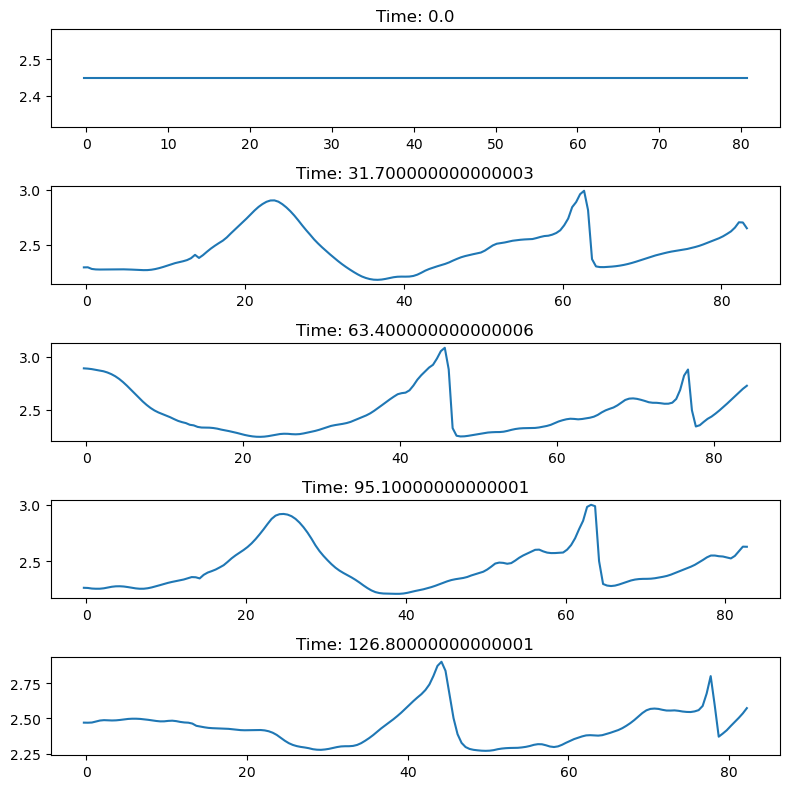

In [17]:
nrows = 5
fig, axs = plt.subplots(nrows = nrows, ncols = 1, figsize = (8,nrows * (1.6)))

# Convert the axs to an array so I can index it, helps if I add more subplots
axs = np.atleast_1d(axs)

# Calc an equal step size to fill the plots
step = math.ceil(len(model_time) / nrows)

# Get the time indices of the model_time arr to plot the data at
time_indices = [val for val in range(0, len(model_time), step)]

# Get the location of the xgrid points
model_xdir = results.var["globalx"][0, :]

# Plot each of surface vs. plots
for i, time_index in enumerate(time_indices):
    # Get the plot time
    time = model_time[time_index]

    # Set the surface elevation at the selected time
    model_zs = results.var["zs"][time_index, 0, :]

    # Plot the surface elevation w/ time
    axs[i].plot(model_xdir, model_zs, label = "Model")
    
    # Plot the measured data
    axs[i].plot()

    if True:
        axs[i].set_title(f"Time: {time}")
    if False:
        # Format the plot
        axs[i].set_xlabel("Time (s)")
        axs[i].set_ylabel("Surface elevation (m)")

plt.tight_layout()
plt.show()
# Compare it against the lab data

In [18]:
# Load the wave maker data
df_wave_maker = pd.read_csv("wave_maker.csv")
display(df_wave_maker)

# Get the time of lab measurements
lab_time = df_wave_maker["time"]

,time,location,wse
0,0.000000,0.000236,2.447915
1,0.010008,0.000449,2.448109
2,0.020006,0.000165,2.447722
3,0.030004,0.000236,2.447529
4,0.040002,0.000307,2.446885
...,...,...,...
15851,158.510003,0.000378,2.412931
15852,158.520011,0.000378,2.412223
15853,158.530009,0.000236,2.411514
15854,158.539997,0.000590,2.410805


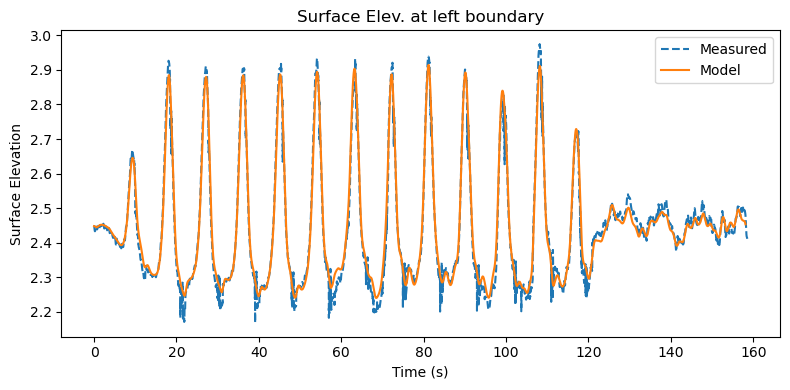

In [19]:
# Plot the data at the prescribed boundary
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))

axs = np.atleast_1d(axs)


i = 0
axs[i].plot(lab_time, df_wave_maker["wse"], 
            linestyle = "dashed", label = "Measured")
axs[i].plot(model_time, left_boundary_zs, label = "Model")

# Format the plot
axs[i].legend()
axs[i].set_title("Surface Elev. at left boundary")
axs[i].set_xlabel("Time (s)")
axs[i].set_ylabel("Surface Elevation")

plt.tight_layout()
plt.show()

In [20]:
lab_time

0          0.000000
1          0.010008
2          0.020006
3          0.030004
4          0.040002
            ...    
15851    158.510003
15852    158.520011
15853    158.530009
15854    158.539997
15855    158.550005
Name: time, Length: 15856, dtype: float64

In [80]:
zs0 = results.var["zs"][0, 0, 0]
zb  = results.var["zb"]
xbeach_u = results.var["u"][:, 0, :]
# get the xgrid
x_grd = results.var["globalx"][0]

In [24]:
from scipy.interpolate import interp1d

# Make a function for the bathymatery
# bathy_func now takes in an x - location and outputs the corresponding z location
bathy_func = interp1d(x_grd, zb[0, 0, :])



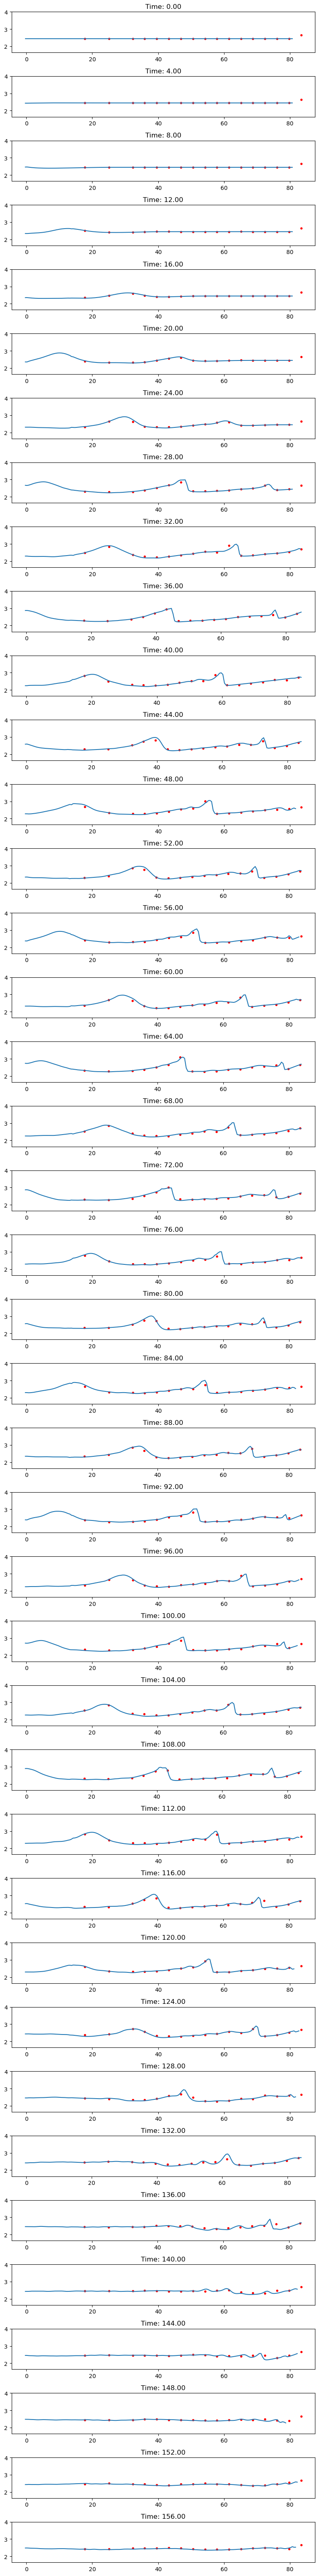

In [25]:
nrows = 40
fig, axs = plt.subplots(nrows = nrows, ncols = 1, figsize = (8,nrows * (1.6)))

# Convert the axs to an array so I can index it, helps if I add more subplots
axs = np.atleast_1d(axs)

# Calc an equal step size to fill the plots
step = math.ceil(len(model_time) / nrows)

# Get the time indices of the model_time arr to plot the data at
time_indices = [val for val in range(0, len(model_time), step)]

# Get the location of the xgrid points
model_xdir = results.var["globalx"][0, :]

# Plot each of surface vs. plots
for i, time_index in enumerate(time_indices):
    # Get the plot time
    model_t = model_time[time_index]

    # Get the closest lab time
    lab_t, lab_index = find_closest(lab_time, model_t)
    # Set the surface elevation at the selected time
    model_zs = results.var["zs"][time_index, 0, :]

    # Plot the surface elevation w/ time
    axs[i].plot(model_xdir, model_zs, label = "Model")

    # Make a copy of the wse elevation from the gauges
    lab_wse_copy = lab_wse.copy()

    # move the wave gauges up by the wse - except for the last one, it's too far too the right
    # for it to measure the d0 water level
    lab_wse_copy[lab_index, :-1] = lab_wse_copy[lab_index, :-1] + zs0

    lab_wse_copy[lab_index, -1] = lab_wse_copy[lab_index, -1] + bathy_func(lab_wg_locs[-1])

    # Plot the measured data
    axs[i].scatter(lab_wg_locs, lab_wse_copy[lab_index, :], 
                label = "lab data {:.2f}".format(lab_t),
                marker = ".", color = "red")
    
    # Plot the bathymtry
    
    # Selecting if only the waves should be plotted
    if False:
        axs[i].plot(model_xdir, zb[time_index, 0, :], label = "bathy")
    else:
        # Select only the waves
        axs[i].set_ylim(zs0-0.8, 4)

    # Setting the legend
    if False:
        axs[i].legend()
    if True:
        axs[i].set_title("Time: {:.2f}".format(model_t))

    # Setting x and y labels - get's kind of messy when there are lots of plots
    if False:
        # Format the plot
        axs[i].set_xlabel("Time (s)")
        axs[i].set_ylabel("Surface elevation (m)")

plt.tight_layout()
plt.show()
# Compare it against the lab data

In [26]:
bathy_func(lab_wg_locs[-1])

array(2.653708)

In [27]:
results.load_modeloutput("u")
u = results.var["u"]

Variable already loaded


In [28]:
df = pd.read_csv("boun_U.bcf", sep = "\\s+", skiprows=3, header=None, names=["t", "zs", "u"])

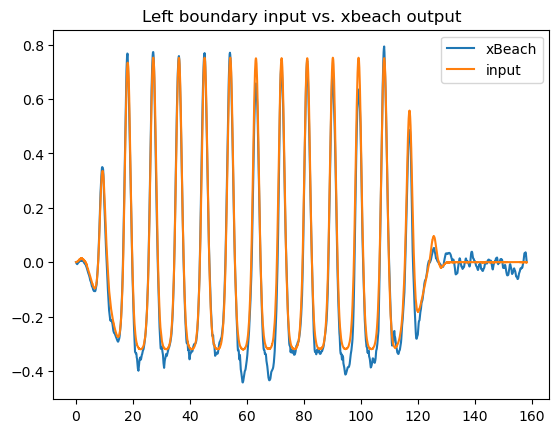

In [29]:
plt.plot(model_time, u[:, 0, 0], label = "xBeach")
plt.plot(df["t"], df["u"], label = "input")
plt.title("Left boundary input vs. xbeach output")
plt.legend()
plt.show()

In [30]:
print(Run_data.wave_gauges[-1])

Wave Gauge Type: ultrasonic
Gauge Id: 17
Location: (83.385, -1.37)


In [31]:
# Let's plot the regular velocity
for adv in Run_data.ADVs:
    print(adv)
    print()

Sensor Name: ADV1 
Sensor id: 1
Flume Height, z (m): 1.567

Sensor Name: ADV2 
Sensor id: 2
Flume Height, z (m): 1.761

Sensor Name: ADV3 
Sensor id: 3
Flume Height, z (m): 1.962

Sensor Name: ADV4 
Sensor id: 4
Flume Height, z (m): 2.162

Sensor Name: ADV5 
Sensor id: 5
Flume Height, z (m): 2.359

Sensor Name: ADV6 
Sensor id: 6
Flume Height, z (m): 2.5599999999999996



In [32]:
print(Run_data.ADVs[0])

Sensor Name: ADV1 
Sensor id: 1
Flume Height, z (m): 1.567


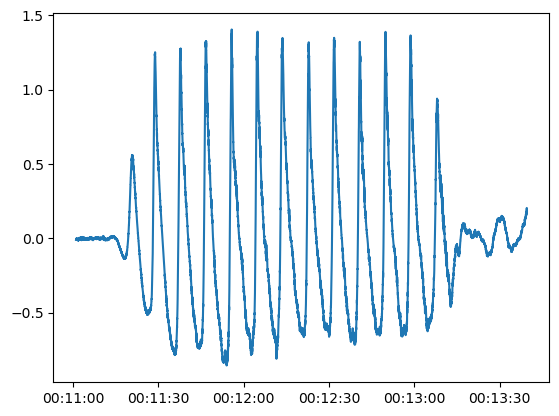

In [33]:
Run_data.ADVs[0].vel["u"]

# Construct a plot to hold the adv data
plt.plot(Run_data.date_time, Run_data.ADVs[0].vel["u"])

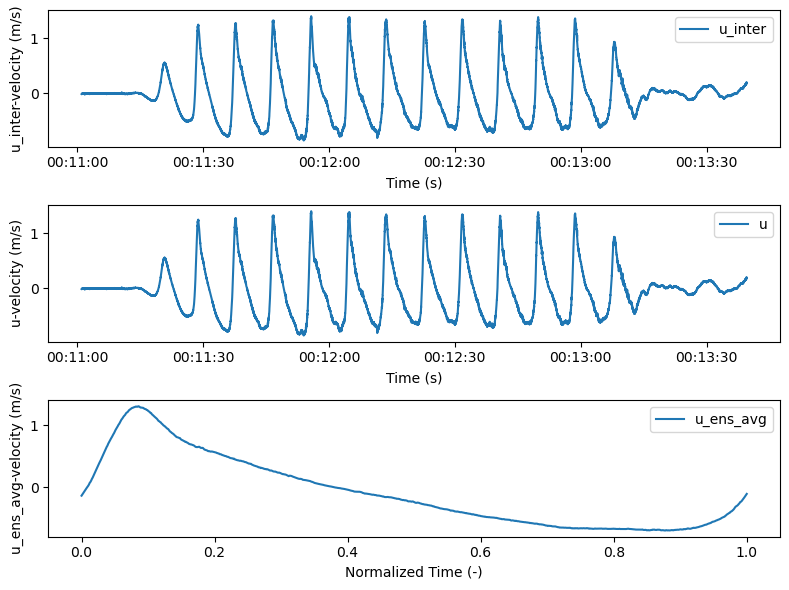

In [47]:
Run_data.ADVs[0].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

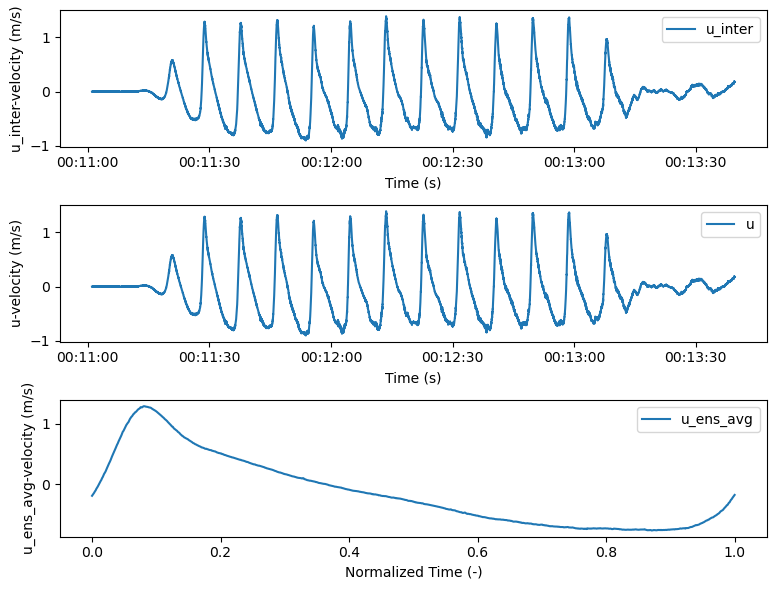

In [46]:
Run_data.ADVs[1].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

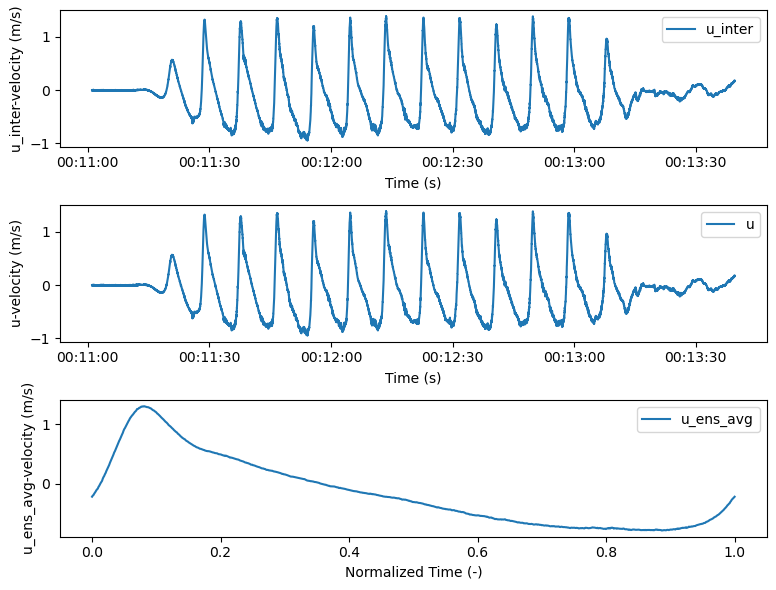

In [45]:
Run_data.ADVs[2].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

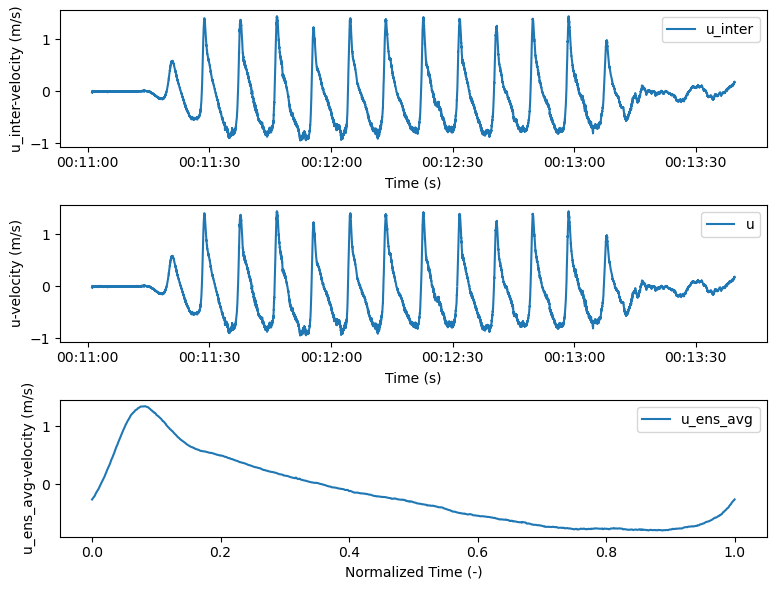

In [44]:
Run_data.ADVs[3].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

In [56]:
print(Run_data.ADVs[4])

Sensor Name: ADV5 
Sensor id: 5
Flume Height, z (m): 2.359


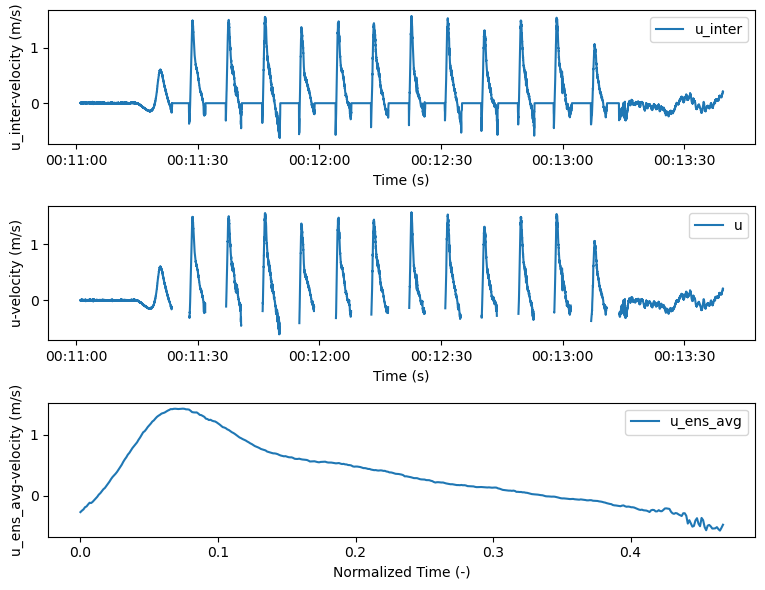

In [43]:
Run_data.ADVs[4].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

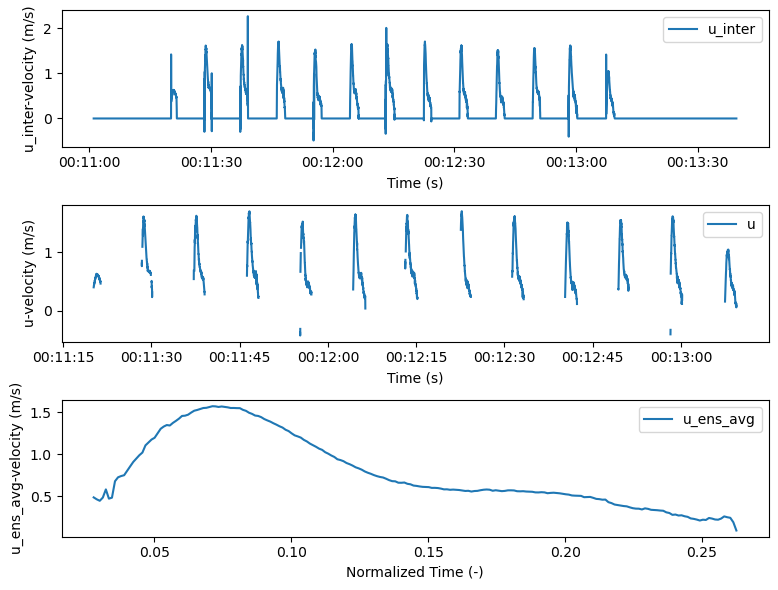

In [42]:
Run_data.ADVs[5].quick_plot(keys = ["u_inter", "u", "u_ens_avg"], legend = True, figsize = (8, 6))

In [97]:
Run_data.ADVs[5].vel["u"]

array([nan, nan, nan, ..., nan, nan, nan])

In [217]:
# Depth average the velocity
Run_data.ADVs[0].vel["u"]

# Init variable to track the sum of the cleaned velocities
sum_u = 0.0
num_sensors = 0
# Loop over the advs
for i, adv in enumerate(Run_data.ADVs[:3]):
    # Sum the cleaned velocity
    u = adv.vel["u"]
    
    sum_u += np.nan_to_num(u)
    num_sensors += 1

lab_u_avg = sum_u/num_sensors

In [218]:
print(num_sensors)

3


In [219]:
Run_data.ADVs[:6]

In [220]:
print(num_sensors)

3


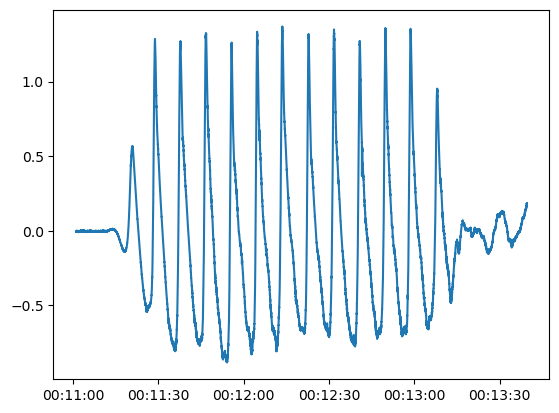

In [221]:
plt.plot(Run_data.date_time, lab_u_avg)

### Information about the ADV
The location of the ADV array was (45 m, 0.57 m) where the flume centerline (along the x-direction) is y = 0. This information came from page 6 of Mieras et al. Large-scale experimental observations of sheet flo.pdf <br>

**Note**: The ADVs are off center. Just pointing that out so I don't forget. I'm not sure if the measurement is the location of the base of the adv or the actual measuring probe.

In [222]:
# Set the coordinate for the advs
lab_adv_xy_coord = [45, 0.57]

# Find the closest location in the grid to the location of the Advs
closest_loc, xdir_index = find_closest(model_xdir, lab_adv_xy_coord[0])

print(f"The closest location to 45 [m] for this grid is at: {closest_loc} [m]")

The closest location to 45 [m] for this grid is at: 45.198 [m]


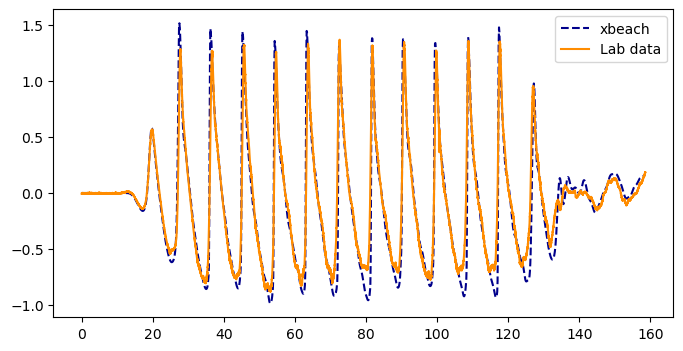

In [233]:
# Plot the xBeach velocity at the closest location

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))

axs = np.atleast_1d(axs)

axs[0].plot(model_time, xbeach_u[:, xdir_index], label = "xbeach",
            color = "darkblue", linestyle = "dashed")
axs[0].plot(lab_time, lab_u_avg, label = "Lab data", 
            color = "darkorange")
plt.legend()
plt.show() 

### Calc the depth averaged velocity
In this section I'm going to calculate the depth averaged velocity using the data from the advs. This was taken at a specific location in the flume. Compare the velocity at the same location in the flume. This is going to need to be done for different times because there is going to be variations.

In [ ]:
# First let's